In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

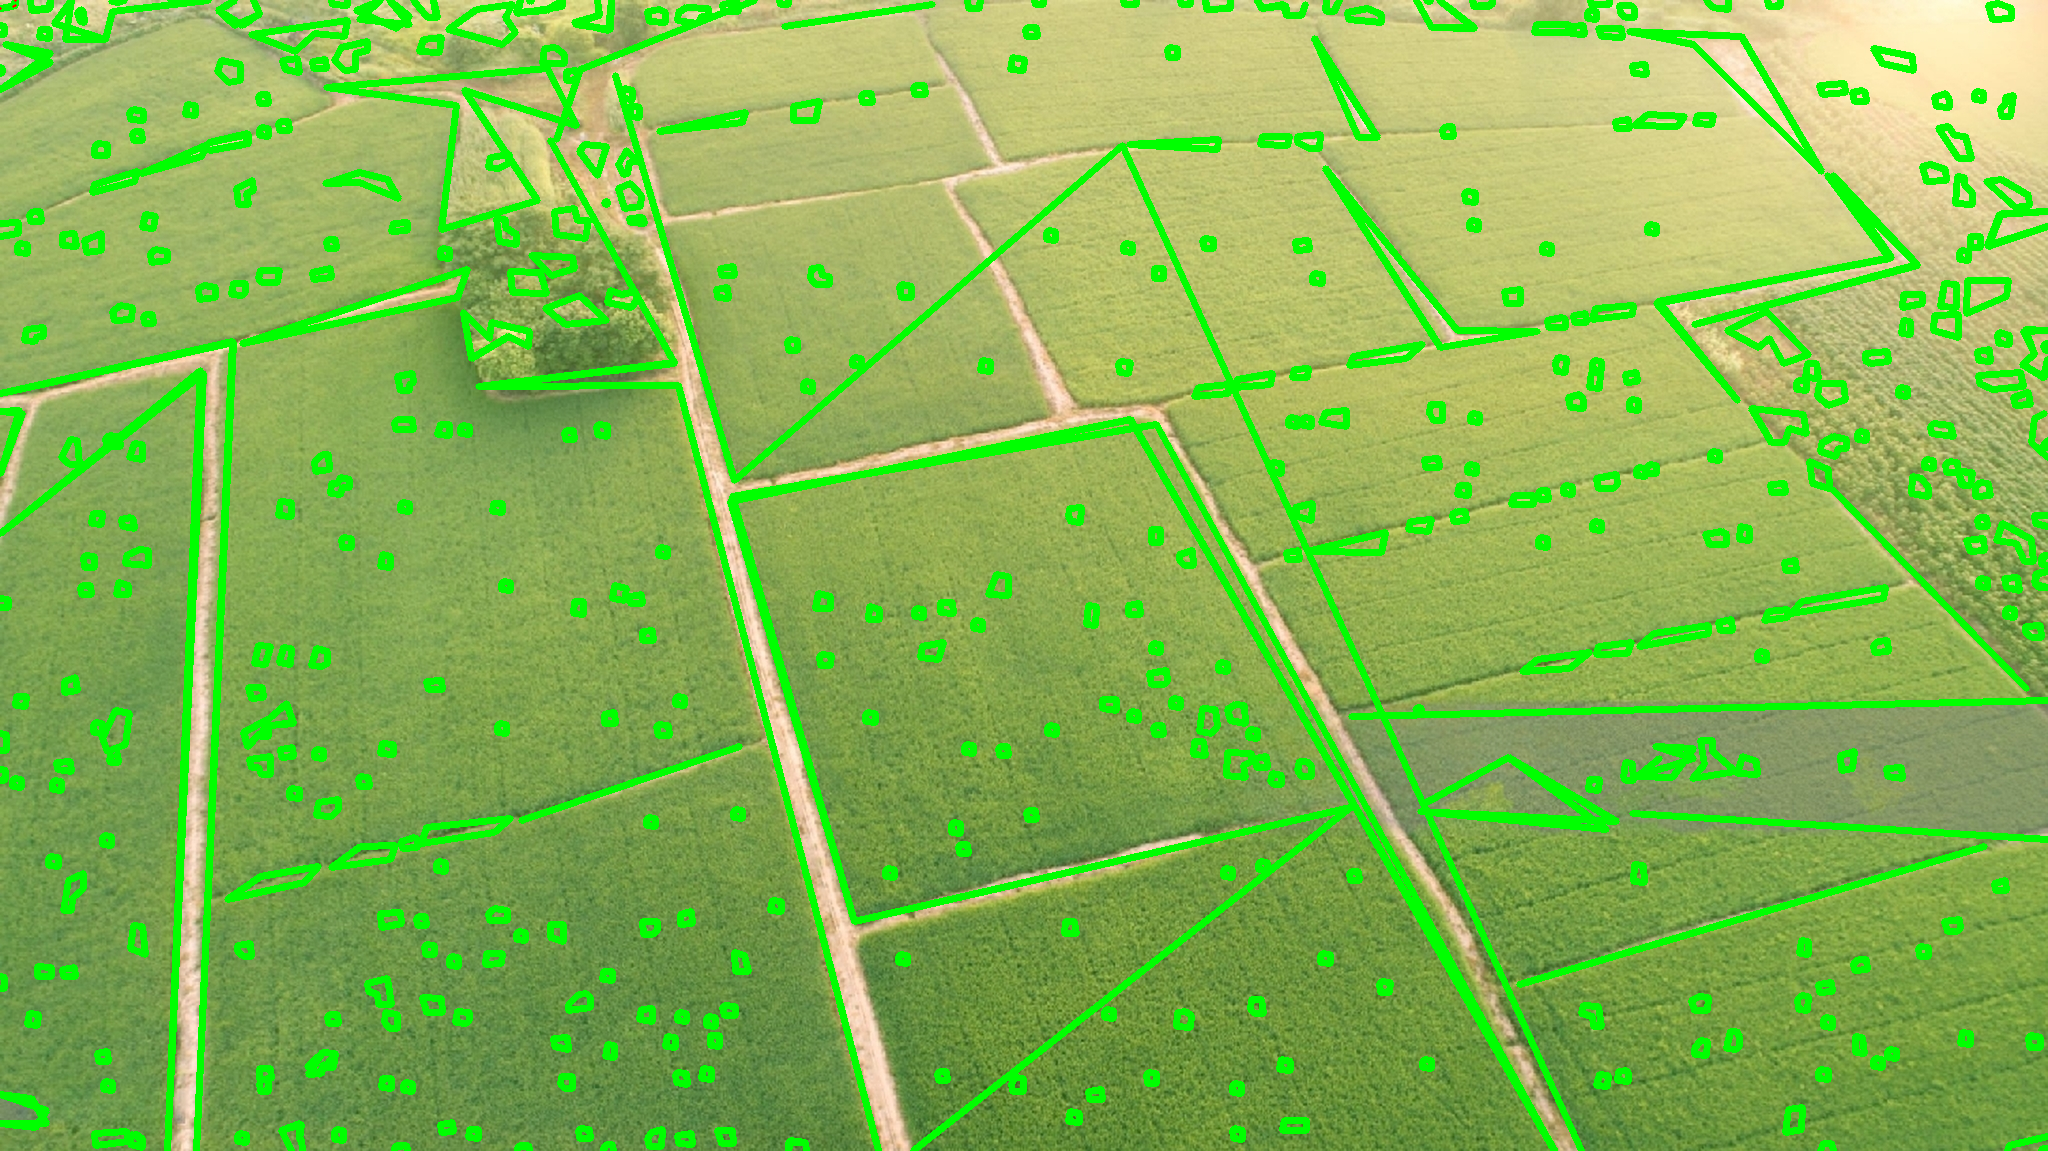

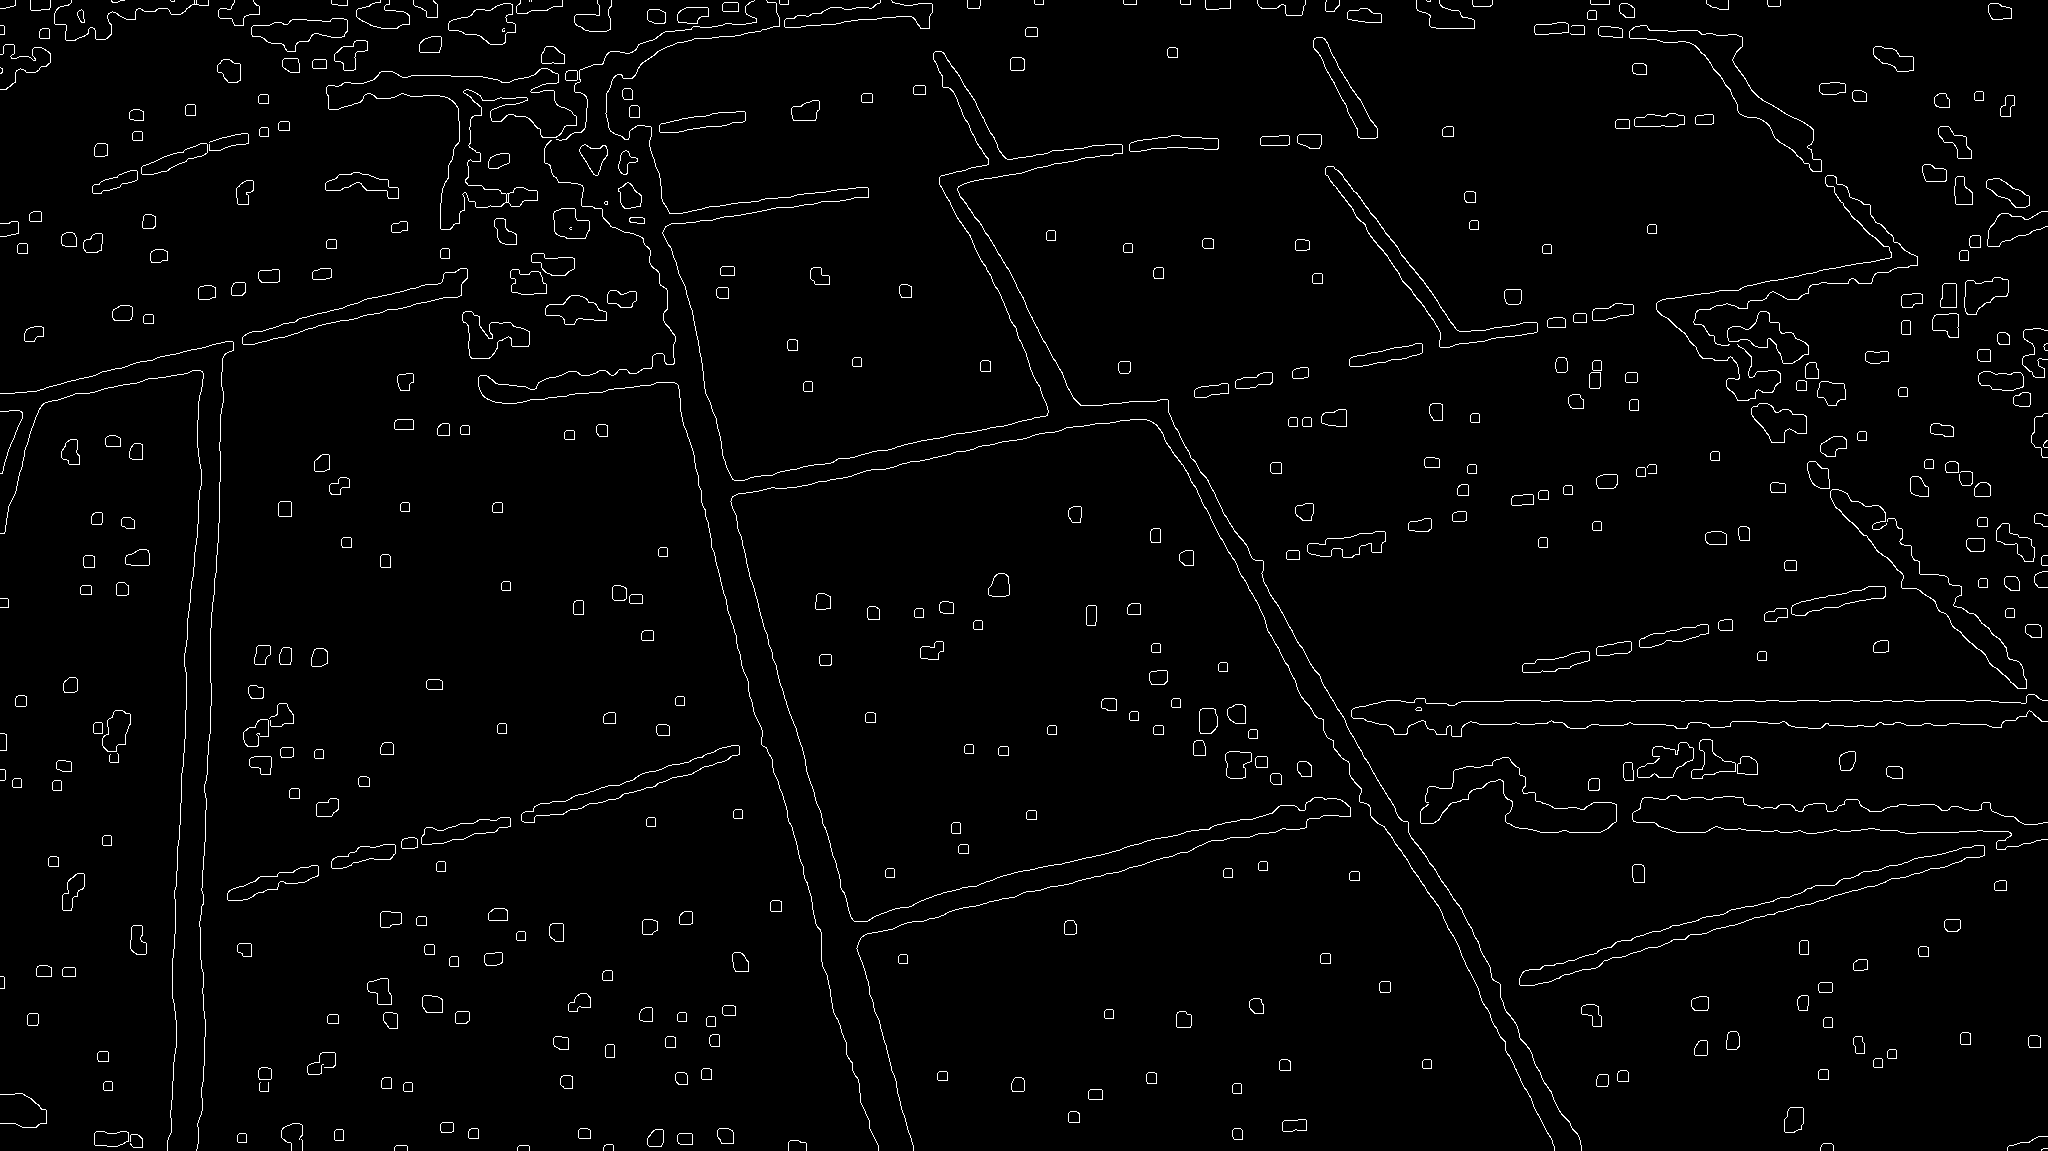

In [183]:
image = cv2.imread('/AerialView.jpeg')
image_gray = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
image_red = image[:,:,0]

b, g, r = cv2.split(image)
diff1 = g.astype(int) - 0.3*b.astype(int) -0.7*r.astype(int)
diff2 = np.where(diff1 < 0, 0, diff1)  # Replace negative values with 0  # Replace negative values with 0
diff = diff2.astype(np.uint8)


blur1 = cv2.GaussianBlur(diff, (3,3), 0)
image_th = cv2.threshold(blur1, 130, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


image_th  = cv2.adaptiveThreshold(diff, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 53, 2) 


blur2 = cv2.GaussianBlur(image_th, (13,13), 0)
_,image_th2 = cv2.threshold(blur2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)



kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
image_closed = cv2.morphologyEx(image_th2, cv2.MORPH_CLOSE, kernel,iterations=1)
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
image_closed = cv2.morphologyEx(image_closed, cv2.MORPH_CLOSE, kernel,iterations=4)

kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (4, 4))
image_opened = cv2.morphologyEx(image_th2, cv2.MORPH_ERODE, kernel,iterations=5)
image_opened = cv2.morphologyEx(image_opened, cv2.MORPH_OPEN, kernel,iterations=5)





edges = cv2.Canny(image_closed, 50, 200)

contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

total = 0
for c in contours:
    epsilon = 0.04 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, epsilon, True)

    cv2.drawContours(image, [approx], -1, (0, 255, 0), 5)
    total += 1

#cv2.drawContours(image, contours, -1, (0, 255, 0), 2)
cv2.drawContours(image, approx, -1, (0, 0, 255), 2)

#print(contours)
cv2_imshow(image)
cv2_imshow(edges)

In [ ]:

from scipy import misc
from scipy.ndimage import gaussian_filter
from scipy.signal import medfilt2d
import random






image = cv2.imread('/AerialView.jpeg')

image = cv2.bilateralFilter(image, 15, 80, 80,None)
cv2_imshow(image)
cv2.waitKey(0)  
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  
cv2_imshow(gray)
cv2.waitKey(0) 
# Find Canny edges
# edged = cv2.Canny(gray, 30, 200)
thr1=50
thr2=200


kernel = np.ones((5,5 ),np.float32)/49
# gray = cv2.filter2D(gray,-1,kernel)

# kernel = np.ones((3,3), np.uint8)

gray = cv2.dilate(gray, kernel, iterations=3)

gray = cv2.erode(gray, kernel, iterations=1)



edged = cv2.Canny(gray, thr1, thr2)
cv2_imshow(edged)

kernel = np.ones((3,3), np.uint8)


contours, hierarchy = cv2.findContours(edged, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


  
print("Number of Contours found = " + str(len(contours)))


cntFound = 0
finalCnt = []
for cnt in contours :
    area = cv2.contourArea(cnt)
    print("area",area)
   
    # Shortlisting the regions based on there area.
    if area > 100: 
        # approx = cv2.approxPolyDP(cnt, 
        #                           0.009 * cv2.arcLength(cnt, True), True)
        
        approx = cv2.approxPolyDP(cnt,0.001 * cv2.arcLength(cnt, True), True)
        
        
        M = cv2.moments(cnt)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
   
        # Checking if the no. of sides of the selected region is 7.
        # if(len(approx) == 7): 
        r=random.randint(0,255)
        g=random.randint(0,255)
        b=random.randint(0,255)
        cv2.drawContours(image, [approx], -1, (r, g, b), 3)
        cv2.putText(image, str(cntFound), (cX - 20, cY - 20),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (r, g, b), 2)
        
        cntFound = 1 + cntFound
        finalCnt.append(cnt)

print("Total found after area threshold = ", cntFound)  
cv2_imshow(image)
